In [1]:
!pip install matplotlib
!pip install tensorflow

In [2]:
!pip install -U albumentations


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

#image directory

In [4]:
import os
import random
import shutil

# Define the source directory where your original dataset is located
src_dir = 'C:/Users/admin/Desktop/ImageFolder_Recyclableness'

# Define the destination directories where you want to save your train, validation, and test datasets
base_dir = 'C:/Users/admin/Desktop/ImageFolder_Recyclableness'
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Define the subdirectories for each label
label_dirs = ["O", "X", "S"]

# Define the percentage of data that you want to allocate to each split
train_pct = 0.8*0.8
val_pct = 0.8*0.2
test_pct = 0.2

# Loop over each label folder and split the data into train, validation, and test sets
for label in label_dirs:
    label_dir = os.path.join(src_dir, label)
    files = os.listdir(label_dir)
    random.shuffle(files)
    
    # Determine the number of files allocated to each split
    train_size = int(len(files) * train_pct)
    val_size = int(len(files) * val_pct)
    test_size = int(len(files) * test_pct)
    
    # Allocate the files to each split
    train_files = files[:train_size]
    val_files = files[train_size:train_size+val_size]
    test_files = files[-test_size:]
    
    # Create the destination directories if they do not already exist
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)
    
    # Copy the files to the destination directories
    for file in train_files:
        src_path = os.path.join(label_dir, file)
        dest_path = os.path.join(train_dir, label, file)
        shutil.copyfile(src_path, dest_path)
        
    for file in val_files:
        src_path = os.path.join(label_dir, file)
        dest_path = os.path.join(val_dir, label, file)
        shutil.copyfile(src_path, dest_path)
        
    for file in test_files:
        src_path = os.path.join(label_dir, file)
        dest_path = os.path.join(test_dir, label, file)
        shutil.copyfile(src_path, dest_path)


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [7]:
import os

current_directory = 'C:/Users/admin/Desktop/ImageFolder_Recyclableness'
folders = ['train', 'test', 'val']
subfolders = ['O', 'X', 'S']

for folder in folders:
    for subfolder in subfolders:
        path = os.path.join(current_directory, folder, subfolder)
        for i, filename in enumerate(os.listdir(path)):
            extension = os.path.splitext(filename)[1]
            new_filename = f"{folder}_{subfolder}_{i}{extension}"
            os.rename(os.path.join(path, filename), os.path.join(path, new_filename))


FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/admin/Desktop/ImageFolder_Recyclableness\\train\\O\\O_고철류_고철_고철_0.jpg' -> 'C:/Users/admin/Desktop/ImageFolder_Recyclableness\\train\\O\\train_O_0.jpg'

In [5]:
train_path="C:/Users/admin/Desktop/ImageFolder_Recyclableness/train"
test_path="C:/Users/admin/Desktop/ImageFolder_Recyclableness/test"
val_path="C:/Users/admin/Desktop/ImageFolder_Recyclableness/val"

##이미지명에 한글있는 것 처리

In [6]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):
        
        
        image_path=sub_path+"/"+img
        print(image_path)
        img_arr=cv2.imread(image_path)
        
        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_0.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_10.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_100.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1000.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1001.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1002.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1003.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1004.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1005.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1006.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1007.jpg
C:/Users/admin/Desktop/ImageFolder_Recyclableness/train/O/train_O_1008.jpg
C:/Users/admin/Desktop/ImageFolder

In [7]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 11774 images belonging to 3 classes.
Found 3526 images belonging to 3 classes.
Found 3138 images belonging to 3 classes.


In [9]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [10]:
training_set.class_indices


{'O': 0, 'S': 1, 'X': 2}

In [11]:
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(11774,)
(3526,)
(3138,)


In [12]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [13]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
#from keras.metrics import Precision, Recall, F1Score


In [15]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [17]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
368/368 [==============================] - 1105s 3s/step - loss: 0.7765 - accuracy: 0.6743 - val_loss: 0.6781 - val_accuracy: 0.7154
Epoch 2/10
368/368 [==============================] - 1411s 4s/step - loss: 0.5482 - accuracy: 0.7619 - val_loss: 0.7463 - val_accuracy: 0.7237
Epoch 3/10
368/368 [==============================] - 1573s 4s/step - loss: 0.4588 - accuracy: 0.8075 - val_loss: 0.6884 - val_accuracy: 0.7320
Epoch 4/10
368/368 [==============================] - 1712s 5s/step - loss: 0.4062 - accuracy: 0.8312 - val_loss: 0.8085 - val_accuracy: 0.7020
Epoch 5/10
368/368 [==============================] - 1787s 5s/step - loss: 0.3511 - accuracy: 0.8545 - val_loss: 0.8251 - val_accuracy: 0.7186
Epoch 6/10
368/368 [==============================] - 1799s 5s/step - loss: 0.3028 - accuracy: 0.8806 - val_loss: 0.7389 - val_accuracy: 0.7231
Epoch 6: early stopping


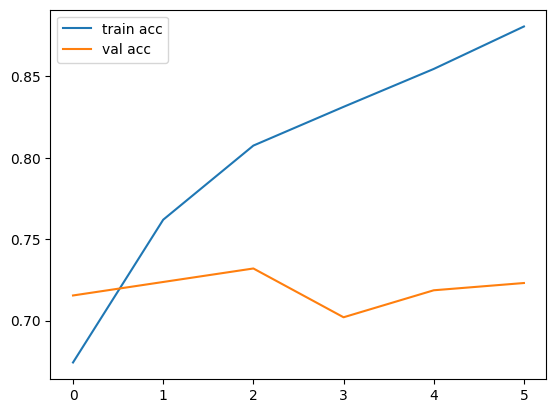

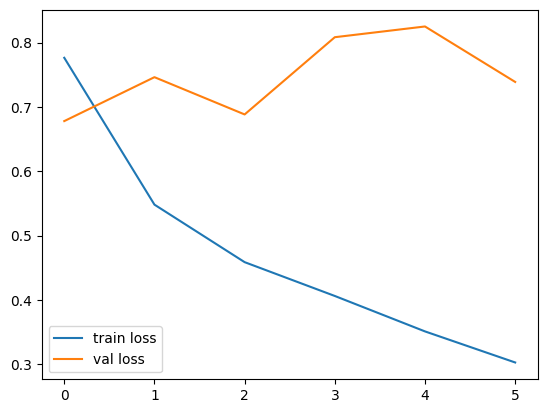

In [18]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [19]:
model.evaluate(test_x,test_y,batch_size=32)


111/111 [==============================] - 201s 2s/step - loss: 0.7550 - accuracy: 0.7212


[0.754953920841217, 0.7212138175964355]

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

111/111 [==============================] - 222s 2s/step


In [21]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1999
           1       0.40      0.54      0.46       284
           2       0.74      0.70      0.72      1243

    accuracy                           0.72      3526
   macro avg       0.64      0.67      0.65      3526
weighted avg       0.73      0.72      0.72      3526



In [22]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[1525  197  277]
 [ 109  154   21]
 [ 347   32  864]]


In [23]:
#model save
model.save('C:/Users/admin/Desktop/ImageFolder_Recyclableness/baseOX_230329.h5')


model 2

In [41]:
model2 = Model(inputs=vgg.input, outputs=prediction)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.metrics import Precision, Recall
